### Rishabh Kumar
#### 16MA20036
  
y''' + 4y" + y' - 6y = 1

y(0) = y'(0) = 0

y'(1) = 1

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 15]s

In [11]:
def BlockTridiagonal(A, B, C, D):
    n = len(D)
    _B = np.zeros(A.shape)
    _C = np.zeros(A.shape)
    _D = np.zeros((n,2,1))
    D_out = np.zeros(_D.shape)
    _C[0] = np.linalg.inv(B[0]).dot(C[0])
    _D[0] = np.linalg.inv(B[0]).dot(D[0])
    
    for i in range(1, n):
        _B[i] = B[i] - A[i].dot(_C[i-1])
        _C[i] = np.linalg.inv(_B[i]) .dot(C[i])
        _D[i] = np.linalg.inv(_B[i]).dot(D[i] - A[i].dot(_D[i-1]))
    D_out[n-1] = np.copy(_D[n-1])
    for i in range(n-2, -1, -1):
        D_out[i] = _D[i] - _C[i].dot(D_out[i+1])
    
    return D_out

In [41]:
def BVP(x0, xn, h):
    n = int(np.ceil((xn - x0)/h))

    A = np.zeros((n-1, 2, 2))
    B = np.zeros((n-1, 2, 2))
    C = np.zeros((n-1, 2, 2))
    D = np.zeros((n-1, 2, 1))
    for i in range(n-1):
        A[i] = np.array([[-1, -h/2], [0, 1/h**2 - 2/h]])
        B[i] = np.array([[1, -h/2], [-6, -2/h**2 + 1]])
        C[i] = np.array([[0, 0], [0, 1/h**2 + 2/h]])
        D[i] = np.array([[0], [1]])
    
    D[n-2] = D[n-2] - np.array([[0], [1/h**2 + 2/h]])
    X = BlockTridiagonal(A, B, C, D)
    y = X[:, 0]
    
    y = np.reshape(y, n-1)
    print(y.shape)
#     print(y)
#     y = np.append(y, ((1/h - 1/h**2 + 4/h - 3*X[n-2, 1]/h**2)/6))
    print(y)
#     print(A)
#     print(B)
#     print(C)
#     print(D)
    return y


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Shape of x_range
(10,)
(9,)
[0.01224889 0.04525781 0.09280878 0.15083668 0.2168081  0.28927787
 0.3675745  0.45157872 0.54156916]
(10,)
[0.         0.01224889 0.04525781 0.09280878 0.15083668 0.2168081
 0.28927787 0.3675745  0.45157872 0.54156916]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
Shape of x_range
(20,)
(19,)
[0.00330832 0.01268219 0.02711657 0.04578576 0.06801587 0.09326135
 0.1210852  0.1511421  0.18316417 0.21694893 0.25234915 0.28926427
 0.32763325 0.36742848 0.40865079 0.45132524 0.49549761 0.54123159
 0.58860637]
(20,)
[0.         0.00330832 0.01268219 0.02711657 0.04578576 0.06801587
 0.09326135 0.1210852  0.1511421  0.18316417 0.21694893 0.25234915
 0.28926427 0.32763325 0.36742848 0.40865079 0.45132524 0.49549761
 0.54123159 0.58860637]
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0

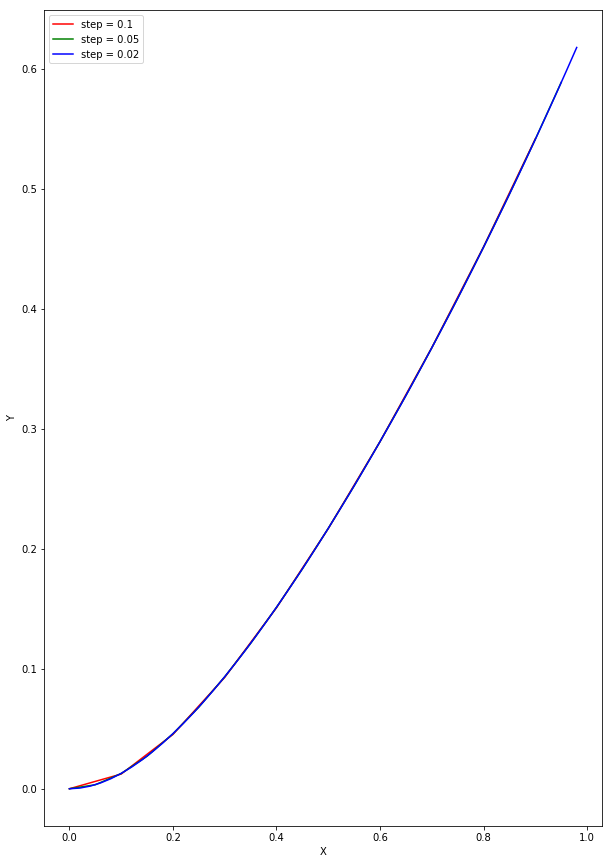

In [42]:
def func(x0, xn, h = 0.1):
    return np.arange(x0, xn, h)
steps = [0.1, 0.05, 0.02]
colors = ['r', 'g', 'b']
x0 = 0
xn = 1
labels = ["step = 0.1", "step = 0.05", "step = 0.02"]
for step in steps: 
    x_range = func(x0, xn, step)
    print(x_range)
    print("Shape of x_range")
    print(x_range.shape)
    y = BVP(x0, xn, step)
    
    y = np.insert(y, 0, 0)
    print(y.shape)
    print(y)
    plt.xlabel('X')
    plt.ylabel('Y')
    i = steps.index(step)
    plt.plot( x_range, y, colors[i])
    plt.savefig("Plot.png")
    plt.gca().legend(labels)